# Red Wine Quality

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

# Attributes


Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

Inspiration

Using machine learning to determine which physiochemical properties make a wine 'good'!

# Objectives

The objectives of this project are as follows:

1-To experiment with different classification methods to see which yields the highest accuracy


2-To determine which features are the most indicative of a good quality wine


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.shape

(1599, 12)

The data contains 1599 rows and 12 columns

In [4]:
#checking null values

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Since there are are no null values we can proceed with Data analysis

In [5]:
#checking the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


All values are in float type and target value in integer type. We are good to go.

# Checking distribution

In [6]:
df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

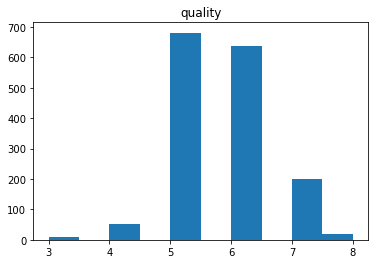

In [7]:
df["quality"].hist(grid=False)
plt.title("quality")
plt.show()

Above graph shows that the target variables have different distribution. Most of the Wine quality is in 5 and 6. But we have the problem that the quality of below 7 is considered as bad quality, and 7 and higher is of good quality. We will not do SMOTE analysis here since we have to convert the target values to binary before we do classification techniques.

# Describing the data

In [8]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


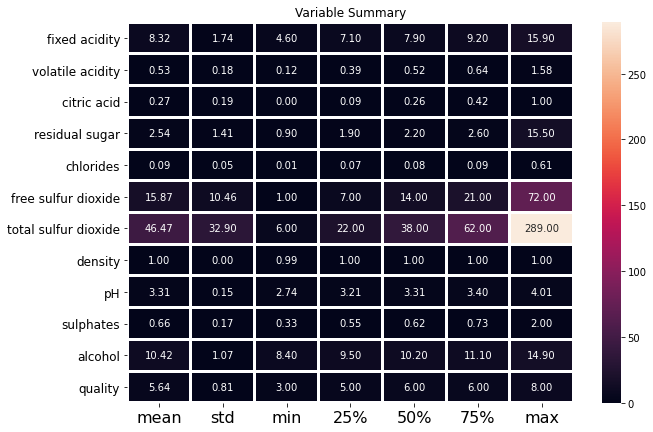

In [9]:
plt.figure(figsize=(10,7))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt='0.2f')
plt.xticks(fontsize=16)
plt.yticks(fontsize=12)
plt.title('Variable Summary')
plt.show()

We can use Scaling before using classification, since we have different values in total sulfur dioxide. In the meantime we will find Correlation,skewnessoutliers as well and treat them accordingly.

# Correlation

In [10]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

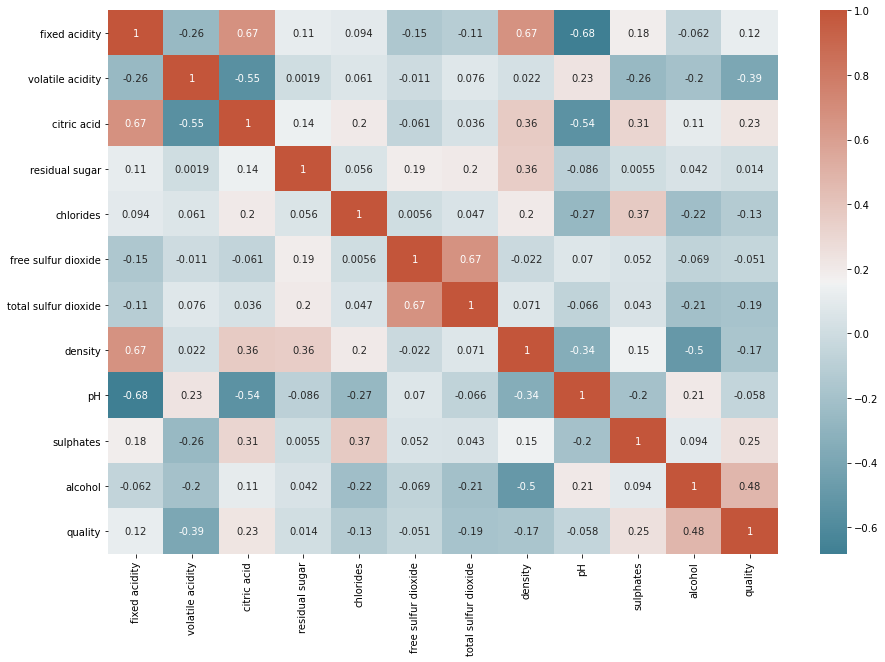

In [11]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

The max correlation value is 48% for the independent variable "alcohol" with "quality". 
Next comes "sulphates" which is 25% correlated with "quality".
The least correlation is with "volatile acidity" which is -39%.
"citric acid" and "quality" has a correlation of 23%.
"fixed acidity" and "residual sugar" are also positively corelated and rest all are negatively corelated.

We can also figure out that, "citric acid" and "density" is highly correlated with "fixed acidity" which is at 67%.
 Also free sulphur dioxide and total sulphur dioxide are correlated at 67% to each other.

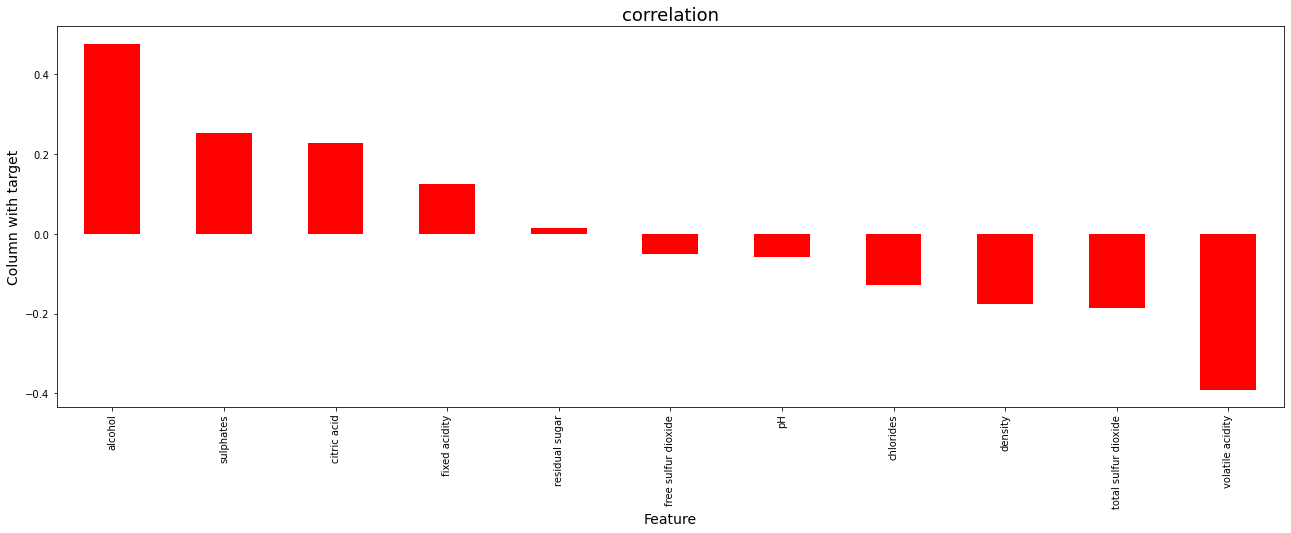

In [12]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='r')
plt.xlabel('Feature',fontsize=14)
plt.ylabel("Column with target",fontsize=14)
plt.title("correlation",fontsize=18)
plt.show()

alcohol, sulphates, citric acid, fixed acidity, residual sugar are in positive side and free sulphur oxide, pH, chlorides, density, total sulphur oxide and volatile acidity are on the negative side.

# Checking Outliers

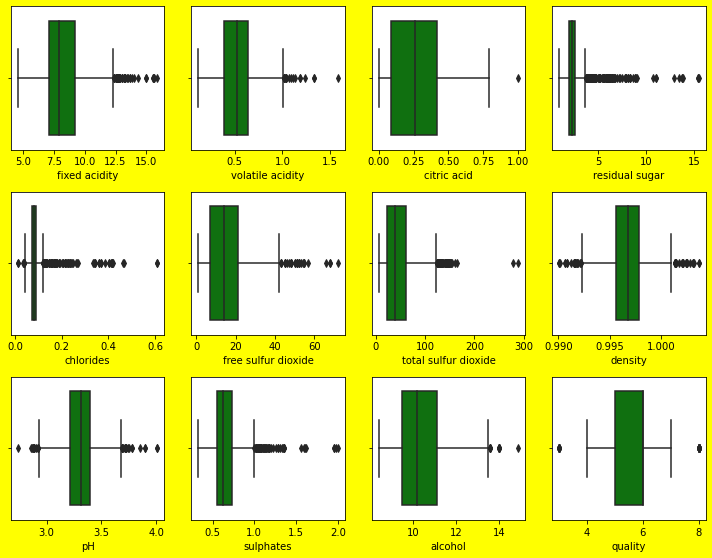

In [13]:
plt.figure(figsize=(10,10),facecolor='yellow')
graph=1 

for column in df:

    plt.subplot(4,4,graph)

    sns.boxplot(df[column],color='green',orient='v')

    plt.xlabel(column,fontsize=10)

    graph+=1

    plt.tight_layout()

As we can see from above graph that there are many outliers present in each columns. We have many outliers in "residual sugar", "free sulfur oxide", "chlorides" and "sulphates". All the columns have outliers in the given data.

In [14]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

<AxesSubplot:xlabel='fixed acidity', ylabel='Density'>

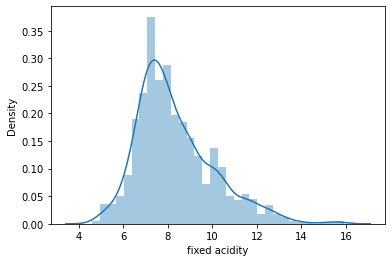

In [15]:
sns.distplot(df['fixed acidity'])

<AxesSubplot:xlabel='volatile acidity', ylabel='Density'>

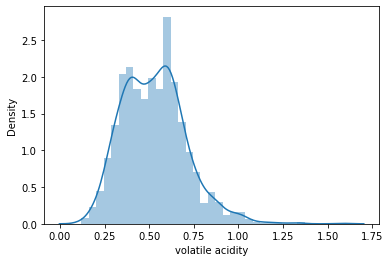

In [16]:
sns.distplot(df['volatile acidity'])

<AxesSubplot:xlabel='chlorides', ylabel='Density'>

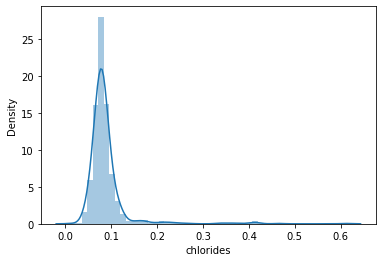

In [17]:
sns.distplot(df['chlorides'])

<AxesSubplot:xlabel='free sulfur dioxide', ylabel='Density'>

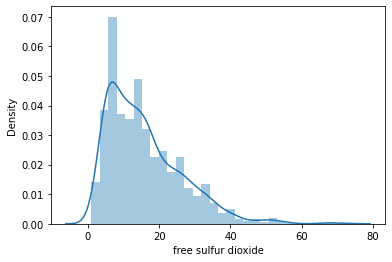

In [18]:
sns.distplot(df['free sulfur dioxide'])

<AxesSubplot:xlabel='total sulfur dioxide', ylabel='Density'>

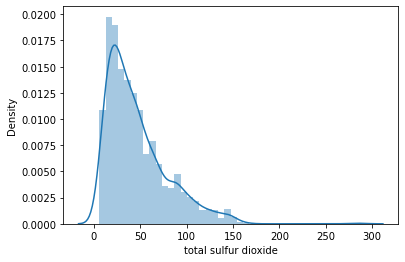

In [19]:
sns.distplot(df['total sulfur dioxide'])

<AxesSubplot:xlabel='sulphates', ylabel='Density'>

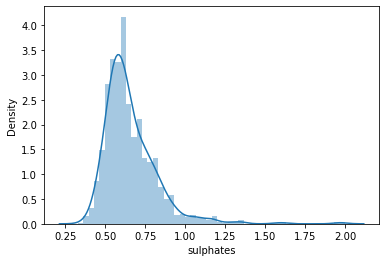

In [20]:
sns.distplot(df['sulphates'])

<AxesSubplot:xlabel='alcohol', ylabel='Density'>

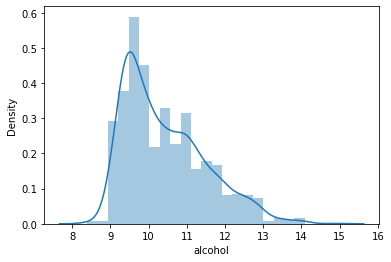

In [21]:
sns.distplot(df['alcohol'])

<AxesSubplot:xlabel='residual sugar', ylabel='Density'>

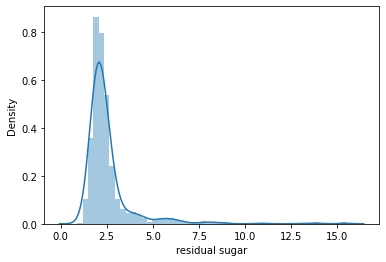

In [22]:
sns.distplot(df['residual sugar'])

From the above graphs, we can see that 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur diode', 'sulphates', 'alcohol' are not normalised. Hence we have to normalise the data.

# Dropping the columns

In [23]:
delete=pd.DataFrame([["0.013732","residual sugar","No","Alot"],["-0.050656","free sulfur dioxide","No","Alot"]],columns=["Correlation with Target","Variable Name","Normalised","Outliers"])
delete

,Correlation with Target,Variable Name,Normalised,Outliers
0,0.013732,residual sugar,No,Alot
1,-0.050656,free sulfur dioxide,No,Alot


Since these 2 columns have a lot of outliers, the data is not normalised and correlation with the "quality" is very less we can drop these columns.

In [24]:
df=df.drop(["residual sugar","free sulfur dioxide"],axis=1)
df

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
from scipy.stats import zscore

z=np.abs(zscore(df))
z.shape

(1599, 10)

In [26]:
threshold=3
print(np.where(z>3))

(array([  13,   15,   17,   17,   19,   38,   42,   43,   45,   81,   81,
         83,   86,   88,   91,   92,   95,  106,  106,  109,  120,  126,
        127,  142,  144,  147,  151,  151,  151,  151,  169,  169,  181,
        199,  226,  226,  240,  243,  244,  258,  258,  281,  291,  339,
        340,  347,  354,  374,  381,  391,  442,  442,  451,  459,  467,
        480,  515,  517,  544,  554,  554,  555,  555,  557,  557,  568,
        588,  591,  608,  614,  636,  639,  649,  651,  652,  652,  672,
        672,  684,  690,  690,  692,  692,  695,  723,  724,  730,  754,
        776,  777,  795,  821,  832,  836,  837,  889,  899, 1017, 1018,
       1051, 1051, 1079, 1081, 1111, 1114, 1165, 1244, 1260, 1269, 1269,
       1270, 1270, 1288, 1289, 1299, 1299, 1300, 1312, 1316, 1319, 1319,
       1321, 1367, 1370, 1370, 1372, 1372, 1374, 1374, 1434, 1435, 1469,
       1474, 1476, 1478, 1493, 1496, 1505, 1558, 1570]), array([7, 4, 3, 7, 3, 1, 3, 7, 6, 3, 7, 3, 7, 7, 7, 7, 6, 3, 7, 4,

In [27]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1599, 10)
(1484, 10)


In [28]:
losspercent=(1599-1484)/1599*100
losspercent

7.191994996873046

# Splitting the target to Good and Bad

In [29]:
df_new['goodquality'] = [1 if x >= 7 else 0 for x in df_new['quality']]
# Separate feature variables and target variable

x = df_new.drop(['quality','goodquality'], axis = 1)
y = df_new['goodquality']

In [30]:
x.shape

(1484, 9)

In [31]:
y.shape

(1484,)

In [32]:
df_new

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2,5,0


In [33]:
df_new.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'quality', 'goodquality'],
      dtype='object')

In [34]:
df_new['goodquality'].value_counts()

0    1280
1     204
Name: goodquality, dtype: int64

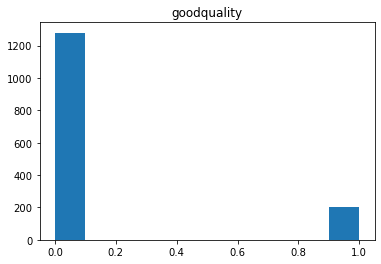

In [35]:
df_new["goodquality"].hist(grid=False)
plt.title("goodquality")
plt.show()

In [36]:
df_new

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2,5,0


In [37]:
X=df_new.iloc[:,:-2]
X

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,0.098,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,0.092,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,0.075,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,0.076,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,0.090,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,0.062,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,0.076,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,0.075,44.0,0.99547,3.57,0.71,10.2


In [38]:
y=df_new.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: goodquality, Length: 1484, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [41]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [42]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

LogisticRegression()

In [43]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)


DecisionTreeClassifier()

In [44]:
from sklearn.model_selection import cross_val_score

cvs = cross_validate(lr, X_train_scaled,y_train)

In [45]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), ('standardscaler', StandardScaler()),('logisticregression', LogisticRegression())])
pipe.fit(X_train, y_train)

cross_validate(pipe, X_train, y_train)

{'fit_time': array([0.01145291, 0.01159382, 0.01128078, 0.01144218, 0.01152587]),
 'score_time': array([0.00146198, 0.00145292, 0.00145721, 0.00144982, 0.00156522]),
 'test_score': array([0.79820628, 0.80269058, 0.76681614, 0.78828829, 0.86936937])}

In [46]:
pipe = Pipeline(steps = [('smote', SMOTE(random_state = 42)), 
                      ('standardscaler', StandardScaler()),
                      ('dtc', DecisionTreeClassifier())])

pipe.fit(X_train, y_train)
pipe.score(X_test,y_test)
cross_validate(pipe, X_train, y_train)

{'fit_time': array([0.01706719, 0.01467896, 0.01453805, 0.01454425, 0.01469612]),
 'score_time': array([0.00171995, 0.00153017, 0.00147271, 0.0015099 , 0.00160813]),
 'test_score': array([0.86995516, 0.86547085, 0.8206278 , 0.83333333, 0.87837838])}

In [47]:
from sklearn.model_selection import GridSearchCV

dtc= DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy']}

gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(X,y)

best_parameters=gd_sr.best_params_
print("best Criterion:- ",best_parameters)

print("Score: ", gd_sr.best_score_)

best Criterion:-  {'criterion': 'gini'}
Score:  0.8429747929747929


In [48]:
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X,y)
prd=dtc.predict(X_test)
print('Accuracy ::',accuracy_score(y_test,prd))
confusion_matrix(y_test,prd)

Accuracy :: 1.0


array([[319,   0],
       [  0,  52]])

In [49]:
prd=dtc.predict(X_test)
from sklearn.model_selection import cross_val_score
dtcc=accuracy_score(y_test,prd)
for i in range(2,15):
    score=cross_val_score(dtc,x,y,cv=i)
    cvmean=score.mean()
    print("At CV: ",i)
    print("CV Score is:",cvmean*100)
    print("\n")

At CV:  2
CV Score is: 76.54986522911051


At CV:  3
CV Score is: 82.47631510789405


At CV:  4
CV Score is: 80.66037735849058


At CV:  5
CV Score is: 83.62612612612614


At CV:  6
CV Score is: 82.94942536241349


At CV:  7
CV Score is: 83.89487870619945


At CV:  8
CV Score is: 83.27956989247312


At CV:  9
CV Score is: 82.75067750677506


At CV:  10
CV Score is: 83.20696535461639


At CV:  11
CV Score is: 82.88557213930349


At CV:  12
CV Score is: 82.60665267943001


At CV:  13
CV Score is: 82.81112480197147


At CV:  14
CV Score is: 84.29919137466308




# Ensembling Techniques

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8975741239892183
[[310   9]
 [ 29  23]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       319
           1       0.72      0.44      0.55        52

    accuracy                           0.90       371
   macro avg       0.82      0.71      0.74       371
weighted avg       0.89      0.90      0.89       371



In [51]:
from sklearn.ensemble import AdaBoostClassifier
#adaboostclassifier(base_estimator=dtc(),n_estimators=50,learning rate=1.0(default)

ad=AdaBoostClassifier()
ad.fit(X_train,y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8733153638814016
[[303  16]
 [ 31  21]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       319
           1       0.57      0.40      0.47        52

    accuracy                           0.87       371
   macro avg       0.74      0.68      0.70       371
weighted avg       0.86      0.87      0.86       371



In [52]:
from sklearn.svm import SVC

svc=SVC(kernel='linear')
ad=AdaBoostClassifier(n_estimators=50,base_estimator=svc,algorithm='SAMME')
ad.fit(X_train,y_train)
ad_pred=ad.predict(X_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.8571428571428571
[[308  11]
 [ 42  10]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       319
           1       0.48      0.19      0.27        52

    accuracy                           0.86       371
   macro avg       0.68      0.58      0.60       371
weighted avg       0.82      0.86      0.83       371



<AxesSubplot:>

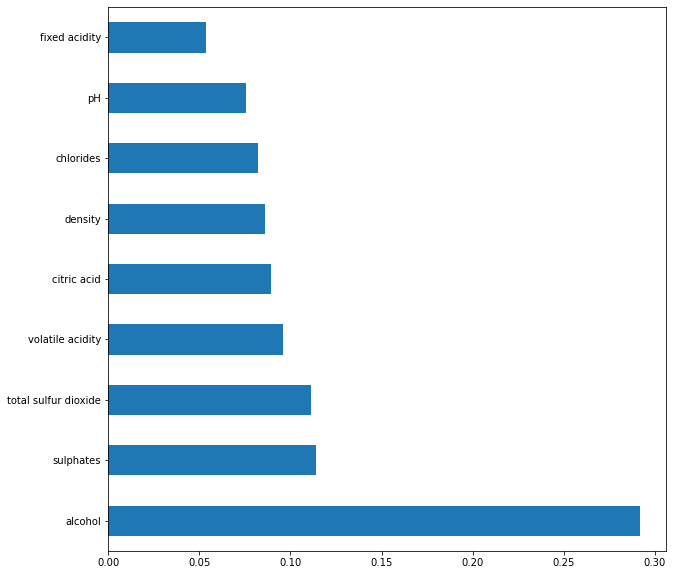

In [53]:
feat_importances = pd.Series(dtc.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))


<AxesSubplot:>

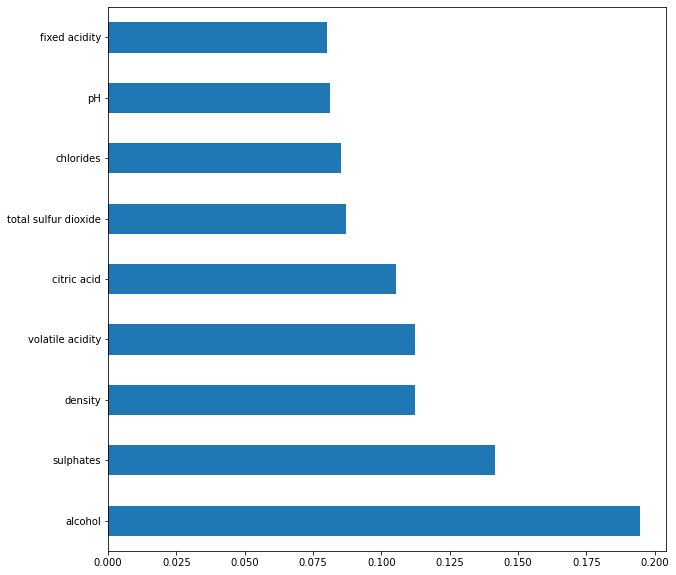

In [54]:
feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(25).plot(kind='barh',figsize=(10,10))

In [55]:
dfgood = df_new[df_new['goodquality']==1]
dfgood.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.0
mean,8.843137,0.408995,0.374412,0.075564,31.568627,0.996088,3.289069,0.744069,11.508905,7.078431,1.0
std,1.807920,0.145310,0.190884,0.020240,21.103316,0.001991,0.142188,0.121346,0.937420,0.269511,0.0
min,5.100000,0.120000,0.000000,0.038000,7.000000,0.991570,2.880000,0.470000,9.500000,7.000000,1.0
25%,7.400000,0.310000,0.317500,0.063000,16.000000,0.994783,3.200000,0.657500,10.800000,7.000000,1.0
50%,8.800000,0.370000,0.400000,0.073000,25.000000,0.995815,3.280000,0.740000,11.550000,7.000000,1.0
75%,10.100000,0.500000,0.490000,0.085250,42.000000,0.997350,3.372500,0.820000,12.200000,7.000000,1.0
max,13.300000,0.915000,0.760000,0.216000,106.000000,1.002200,3.710000,1.130000,13.600000,8.000000,1.0


In [56]:
dfbad = df_new[df_new['goodquality']==0]
dfbad.describe()

,fixed acidity,volatile acidity,citric acid,chlorides,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodquality
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000,1280.0
mean,8.206641,0.541480,0.246875,0.082521,46.687500,0.996835,3.320859,0.625938,10.241628,5.429688,0.0
std,1.600443,0.165081,0.184702,0.021178,30.767235,0.001660,0.140082,0.123745,0.922447,0.565956,0.0
min,5.000000,0.160000,0.000000,0.038000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000,0.0
25%,7.100000,0.420000,0.080000,0.071000,23.000000,0.995770,3.220000,0.540000,9.500000,5.000000,0.0
50%,7.800000,0.540000,0.230000,0.080000,38.000000,0.996800,3.320000,0.600000,10.000000,5.000000,0.0
75%,9.000000,0.645000,0.390000,0.089000,63.000000,0.997870,3.410000,0.680000,10.900000,6.000000,0.0
max,13.500000,1.040000,0.790000,0.226000,145.000000,1.002100,3.750000,1.160000,13.500000,6.000000,0.0
